In [1]:
# Author - Rohit Agrawal
# Roll No - 1610110292
# Course Code - MAT492
# Instructor - Prof. Santosh Singh

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

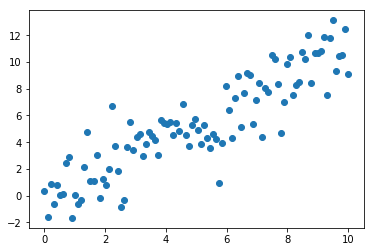

In [2]:
# Data
x = np.linspace(0,10,100)
y = np.linspace(0,10,100) + np.random.randn(100)*2
plt.scatter(x,y)

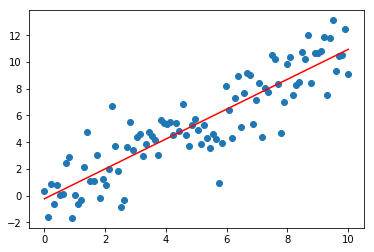

m(slope) = 1.1186876643437857, b(y-intercept) = -0.2357672118352184, Error = 2.7937193358616965


In [3]:
# Regression Line using manual calculation
x_sq = x**2
N = len(x)     # Number of data points
xy = x*y

best_m = (N*np.sum(xy) - np.sum(x)*np.sum(y))/(N*np.sum(x_sq) - np.sum(x)**2)   # slope
best_b = (np.sum(y) - best_m*np.sum(x))/N   # Intercept
y_reg = best_m*x + best_b
plt.scatter(x,y)
plt.plot(x, y_reg, color='red')
plt.show()
error = np.sum((y-y_reg)**2)/len(x)
print('m(slope) = ' + str(best_m) + ', b(y-intercept) = ' + str(best_b) + ', Error = ' + str(error))

In [4]:
def compute_error_for_line_given_points(m,b,x,y):
    totalError = np.sum((y - (m * x + b)) ** 2)
    return totalError / float(len(x))

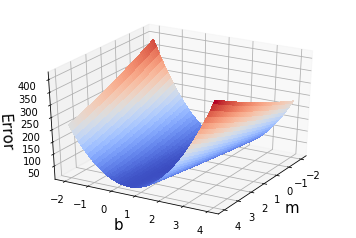

In [5]:
# Error Plot
from matplotlib import cm

m = np.linspace(-2,4,100)
b = np.linspace(-2,4,100)
error = []
for i in m:  
    temp=[]
    for j in b:
        temp.append(compute_error_for_line_given_points(i,j,x,y))
    error.append(temp)
    
error = np.array(error)
X,Y = np.meshgrid(m,b)
fig = plt.figure()
ax = fig.gca(projection='3d')
fig = ax.plot_surface(X, Y, error, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('m', fontsize=15)
ax.set_ylabel('b', fontsize=15)
ax.view_init(azim=30)
ax.set_zlabel('Error', fontsize=15)
plt.show()

# Gradient Descent

In [6]:
# Helper functions for Gradient Descent
def step_gradient(b_current, m_current, x, y, alpha):
    b_gradient = 0
    m_gradient = 0
    N = float(len(x))
    b_gradient = np.sum(-(2/N) * (y - ((m_current * x) + b_current)))
    m_gradient = np.sum(-(2/N) * x * (y - ((m_current * x) + b_current)))
    new_b = b_current - (alpha * b_gradient)
    new_m = m_current - (alpha * m_gradient)
    return new_b, new_m

def gradient_descent_runner(x, y, starting_b, starting_m, alpha, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, alpha)
    return b, m

In [7]:
# Gradient Descent Result
learning_rate = 0.0005
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_m,initial_b,x,y)))
print("Running...")
b, m = gradient_descent_runner(x, y, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(m,b,x,y)))

Starting gradient descent at b = 0, m = 0, error = 42.13789366409733
Running...
After 10000 iterations b = -0.20276107709415142, m = 1.11372485588621, error = 2.793995838180395


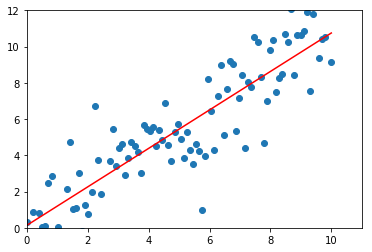

After 199 iterations b = 0.14007999452592598, m = 1.0611220588003536, error = 2.829639581460402


In [8]:
# Visualization of Gradient Descent
from IPython.display import clear_output

learning_rate = 0.0005
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 200
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_m,initial_b,x,y)))
print("Running...")
for i in range(num_iterations):
    clear_output(True)
    b, m = gradient_descent_runner(x, y, initial_b, initial_m, learning_rate, i)
    y_reg = m*x + b
    plt.scatter(x,y)
    plt.plot(x, y_reg, color='red')
    plt.axis([0, 11, 0, 12]) # Change axis limits
    plt.show()
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(i, b, m, compute_error_for_line_given_points(m,b,x,y)))